In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def NASAfun(coeff, T):
    a1, a2, a3, a4, a5, a6, a7 = coeff
    Cp_R = a1 + a2*T + a3*T**2 + a4*T**3 + a5*T**4
    H_RT = a1 + a2*T/2.0 + a3*T**2/3.0 + a4*T**3/4.0 + a5*T**4/5.0 + a6/T
    S_R  = a1*np.log(T) + a2*T + a3*T**2/2.0 + a4*T**3/3.0 + a5*T**4/4.0 + a7
    return Cp_R, H_RT, S_R

In [24]:
def plot(RMG1,RMG2,Deut1,Deut2,species):
    n = 50
    xmax = 5000
    
    T_RMG1_LOW = RMG1[0][0]
    T_RMG1_HIGH = RMG1[0][-1]
    T_RMG1 = np.linspace(T_RMG1_LOW,T_RMG1_HIGH,n,False)
    Cp_R_RMG1=np.linspace(0,0,n)
    H_RT_RMG1=np.linspace(0,0,n)
    S_R_RMG1=np.linspace(0,0,n)
    for i,T in enumerate(T_RMG1):
        Cp_R_RMG1[i], H_RT_RMG1[i], S_R_RMG1[i] = NASAfun(RMG1[1], T)
        
    T_RMG2_LOW = RMG2[0][0]
    T_RMG2_HIGH = RMG2[0][-1]
    T_RMG2 = np.linspace(T_RMG2_LOW,T_RMG2_HIGH,n)
    Cp_R_RMG2=np.linspace(0,0,n)
    H_RT_RMG2=np.linspace(0,0,n)
    S_R_RMG2=np.linspace(0,0,n)
    for i,T in enumerate(T_RMG2):
        Cp_R_RMG2[i], H_RT_RMG2[i], S_R_RMG2[i] = NASAfun(RMG2[1], T)
    
    T_Deut1_LOW = Deut1[0][0]
    T_Deut1_HIGH = Deut1[0][-1]
    T_Deut1=np.linspace(T_Deut1_LOW,T_Deut1_HIGH,n,False)
    Cp_R_Deut1=np.linspace(0,0,n)
    H_RT_Deut1=np.linspace(0,0,n)
    S_R_Deut1=np.linspace(0,0,n)
    for i,T in enumerate(T_Deut1):
        Cp_R_Deut1[i], H_RT_Deut1[i], S_R_Deut1[i] = NASAfun(Deut1[1], T)
        
    T_Deut2_LOW = Deut2[0][0]
    T_Deut2_HIGH = Deut2[0][-1]
    T_Deut2=np.linspace(T_Deut2_LOW,T_Deut2_HIGH,n)
    Cp_R_Deut2=np.linspace(0,0,n)
    H_RT_Deut2=np.linspace(0,0,n)
    S_R_Deut2=np.linspace(0,0,n)
    for i,T in enumerate(T_Deut2):
        Cp_R_Deut2[i], H_RT_Deut2[i], S_R_Deut2[i] = NASAfun(Deut2[1], T)
        
    T_RMG1 = np.append(T_RMG1, T_RMG2)
    Cp_R_RMG1 = np.append(Cp_R_RMG1, Cp_R_RMG2)
    H_RT_RMG1 = np.append(H_RT_RMG1, H_RT_RMG2)
    S_R_RMG1 = np.append(S_R_RMG1, S_R_RMG2)
    
    T_Deut1 = np.append(T_Deut1, T_Deut2)
    Cp_R_Deut1 = np.append(Cp_R_Deut1, Cp_R_Deut2)
    H_RT_Deut1 = np.append(H_RT_Deut1, H_RT_Deut2)
    S_R_Deut1 = np.append(S_R_Deut1, S_R_Deut2)
    
    f = plt.figure(figsize=(14,4))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    ax.plot(T_Deut1, Cp_R_Deut1, label='Deutschmann')
    ax.plot(T_RMG1, Cp_R_RMG1, label='RMG generated')

    ax2.plot(T_Deut1, H_RT_Deut1, label='Deutschmann')
    ax2.plot(T_RMG1, H_RT_RMG1, label='RMG generated')
    ax3.plot(T_Deut1, S_R_Deut1, label='Deutschmann')
    ax3.plot(T_RMG1, S_R_RMG1, label='RMG generated')

    ax.set_xlabel('T (K)')
    ax.set_ylabel('Cp/R')
    ax.legend(loc='best')

    ax2.set_xlabel('T (K)')
    ax2.set_ylabel('H/RT')
    ax2.legend(loc='best')

    ax3.set_xlabel('T (K)')
    ax3.set_ylabel('S/R')
    ax3.legend(loc='best')
    
    ax.set_xlim(0, xmax)
    ax2.set_xlim(0, xmax)
    ax3.set_xlim(0, xmax)
    
    ax2.set_title('For ' + species)
    f.savefig('deutschmann/NASAcomparison-' + species)

# Surface Species

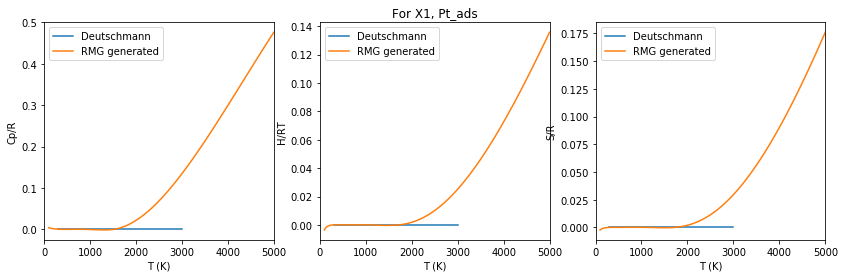

In [31]:
r1 = [100.00, 1554.81],[ 7.10134880E-03, -4.25615041E-05,  8.98521156E-08,
                      -7.80182565E-11,  2.32462166E-14, -8.76099414E-01,
                      -3.11209498E-02]
r2 = [1554.81, 5000.00],[ 1.60301287E-01, -2.52237396E-04,  1.14182282E-07,
                      -1.21473809E-11,  3.85806589E-16, -7.08108147E+01,
                      -9.09535600E-01]
d1 = [  300.00,  1000.00], [  0.000000000E+00,   0.000000000E+00,
                0.000000000E+00,   0.000000000E+00,   0.000000000E+00,
                0.000000000E+00,   0.000000000E+00]
d2 = [ 1000.00,  3000.00], [  0.000000000E+00,   0.000000000E+00,
                0.000000000E+00,   0.000000000E+00,   0.000000000E+00,
                0.000000000E+00,   0.000000000E+00] 
plot(r1,r2,d1,d2,'X1, Pt_ads')

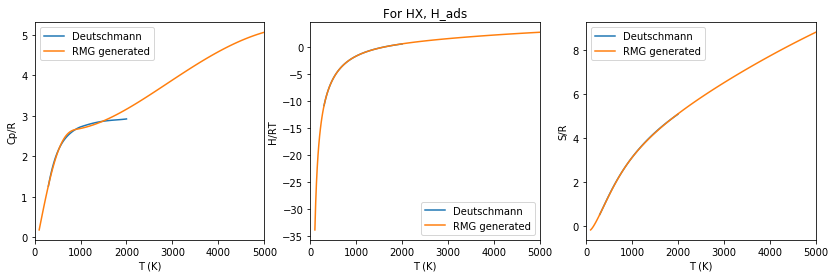

In [32]:
r1 = [100.00, 952.91],[-3.80957846E-01,  5.47219393E-03,  2.60946928E-06,
                      -9.65008412E-09,  4.63967474E-12, -3.37659612E+03,
                       1.01722845E+00]
r2 = [952.91, 5000.00],[ 2.80337105E+00, -5.41002993E-04,  4.99482316E-07,
                      -7.54902555E-11,  3.06721398E-15, -4.31733471E+03,
                      -1.59435356E+01]
d1 = [300.0, 1000.0], [-1.96702988E+00, 1.67920714E-02,
 		 -2.50314139E-05, 1.80485455E-08, -5.11491197E-12,
 		 -3.21277026E+03, 7.68211257E+00]
d2 = [1000.0, 2000.0], [2.71968546E+00, -1.07696656E-03,
 		 2.00193294E-06, -1.12865983E-09, 2.11269165E-13,
 		 -4.24701712E+03, -1.52793490E+01]
plot(r1,r2,d1,d2,'HX, H_ads')

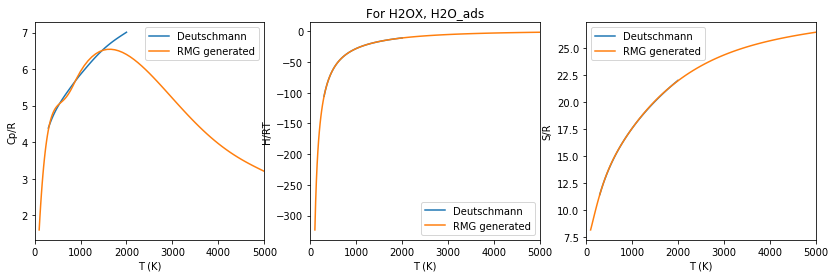

In [33]:
r1 = [100.00, 912.85],[-1.34340519E+00,  3.66696015E-02, -7.99482515E-05,
                       7.74127762E-08, -2.68666529E-11, -3.23490303E+04,
                       1.10237802E+01]
r2 = [912.85, 5000.00],[ 1.12159987E+00,  8.16637387E-03, -4.02356932E-06,
                       7.20418131E-10, -4.51440018E-14, -3.20615278E+04,
                       3.39609648E+00]
d1 = [300.0, 1000.0], [2.53777266E+00, 9.45372010E-03,
 		 -1.41325664E-05, 1.16730945E-08, -3.67657640E-12,
 		 -3.27590463E+04, -5.36548561E+00]
d2 = [1000.0, 2000.0], [5.84789466E+00, -3.31526816E-03,
 		 5.62018785E-06, -2.75864893E-09, 4.61279066E-13,
 		 -3.34885608E+04, -2.15622699E+01]
plot(r1,r2,d1,d2,'H2OX, H2O_ads')

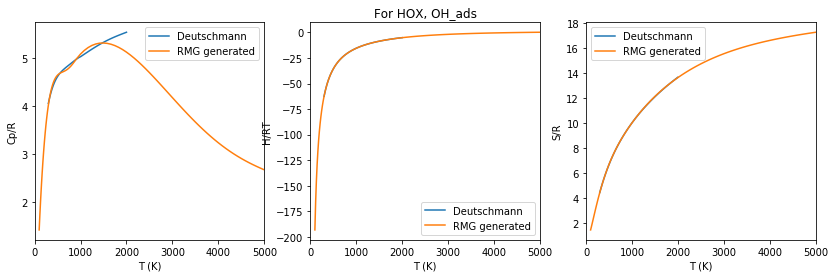

In [34]:
r1 = [100.00, 914.54],[-1.29521674E+00,  3.36486200E-02, -7.07755341E-05,
                       6.54367721E-08, -2.19434475E-11, -1.93470579E+04,
                       4.37653089E+00]
r2 = [914.54, 5000.00],[ 2.43538338E+00,  4.64605477E-03, -2.39990873E-06,
                       4.26359701E-10, -2.60614408E-14, -1.94989025E+04,
                      -1.03877722E+01]
d1 = [300.0, 1000.0], [1.07348583E+00, 1.72652206E-02,
 		 -3.17712232E-05, 2.71536568E-08, -8.69449304E-12,
 		 -1.96002909E+04, -5.65622336E+00]
d2 = [1000.0, 2000.0], [5.01870328E+00, -1.35424298E-03,
 		 2.27686310E-06, -1.09407298E-09, 1.79396487E-13,
 		 -2.02979842E+04, -2.41159621E+01]
plot(r1,r2,d1,d2,'HOX, OH_ads')

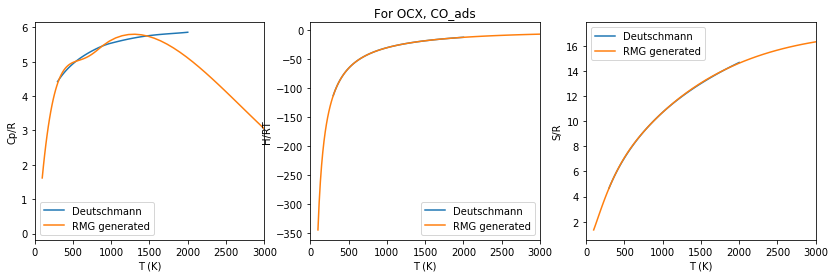

In [98]:
r1 = [100.00, 891.32],[-1.38218471E+00,  3.75310911E-02, -8.29779551E-05,
                       8.09731714E-08, -2.85485057E-11, -3.45176014E+04,
                       4.35463035E+00]
r2 = [891.32, 5000.00],[ 1.38101738E+00,  8.05699435E-03, -4.64297360E-06,
                       8.91142754E-10, -5.90024841E-14, -3.43319731E+04,
                      -4.85379925E+00]
d1 = [300.0, 1000.0], [2.70112272E+00, 8.76650166E-03,
 		 -1.29512418E-05, 1.04194594E-08, -3.39700490E-12,
 		 -3.49476634E+04, -1.28730512E+01]
d2 =[1000.0, 2000.0], [5.52820880E+00, -1.52631254E-03,
 		 2.79791895E-06, -1.54550129E-09, 2.84523223E-13,
 		 -3.56231280E+04, -2.69156979E+01]
plot(r1,r2,d1,d2,'OCX, CO_ads')

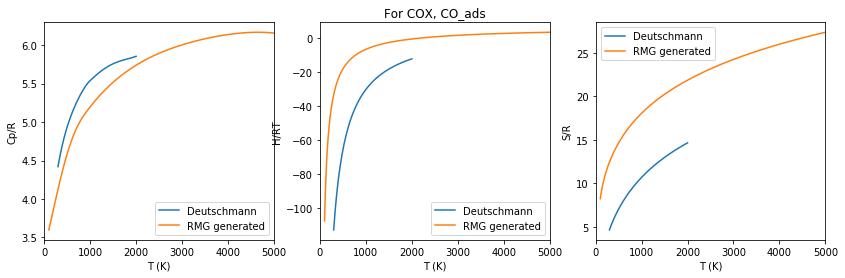

In [35]:
r1 = [100.00, 929.01],[ 3.35301444E+00,  2.26109196E-03,  2.26674457E-06,
                      -4.74031424E-09,  2.05861444E-12, -1.10950769E+04,
                      -7.42472161E+00]
r2 = [929.01, 5000.00],[ 4.10130003E+00,  1.49963942E-03, -4.76438774E-07,
                       7.90340597E-11, -5.45595546E-15, -1.13402836E+04,
                      -1.15511021E+01]
d1 = [300.0, 1000.0], [2.70112272E+00, 8.76650166E-03,
 		 -1.29512418E-05, 1.04194594E-08, -3.39700490E-12,
 		 -3.49476634E+04, -1.28730512E+01]
d2 =[1000.0, 2000.0], [5.52820880E+00, -1.52631254E-03,
 		 2.79791895E-06, -1.54550129E-09, 2.84523223E-13,
 		 -3.56231280E+04, -2.69156979E+01]
plot(r1,r2,d1,d2,'COX, CO_ads')

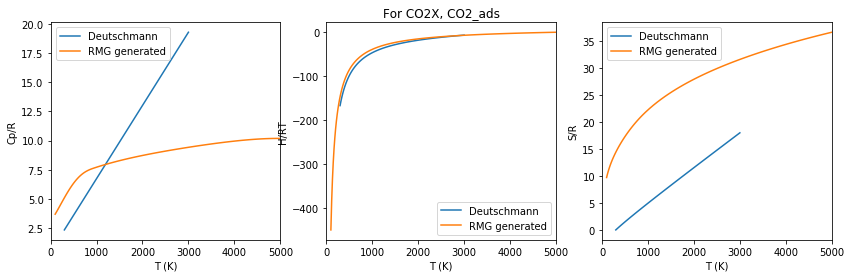

In [36]:
r1 = [100.00, 953.58],[ 3.09270665E+00,  5.29257511E-03,  8.99525075E-06,
                      -1.67139901E-08,  7.04956887E-12, -4.52128361E+04,
                      -5.10062523E+00]
r2 = [953.58, 5000.00],[ 5.99797425E+00,  2.27495290E-03, -6.81151398E-07,
                       1.34446413E-10, -1.11521352E-14, -4.61838021E+04,
                      -2.11646569E+01]
d1 = [  300.00,  1000.00], [  4.690000000E-01,   6.266200000E-03,
		0.000000000E+00,   0.000000000E+00,   0.000000000E+00,
		-5.045870000E+04,  -4.555000000E+00]
d2 = [ 1000.00,  3000.00], [  4.690000000E-01,   6.266000000E-03,
		0.000000000E+00,   0.000000000E+00,   0.000000000E+00,
		-5.045870000E+04,  -4.555000000E+00] 
plot(r1,r2,d1,d2,'CO2X, CO2_ads')

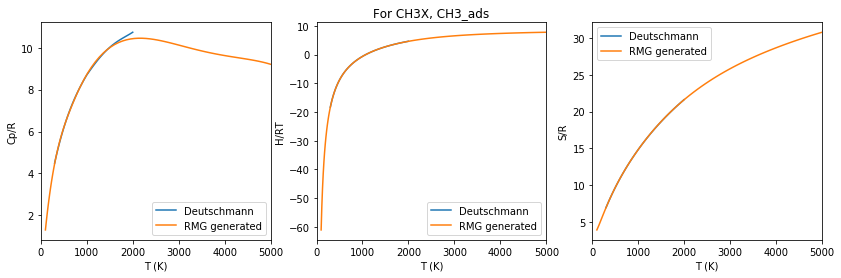

In [37]:
r1 = [100.00, 848.30],[-1.21090611E+00,  2.92390831E-02, -4.49011672E-05,
                       3.86010689E-08, -1.30361474E-11, -6.12022276E+03,
                       6.80940157E+00]
r2 = [848.30, 5000.00],[ 1.62291116E+00,  1.12987225E-02, -5.08316650E-06,
                       9.46832954E-10, -6.42885005E-14, -6.43628865E+03,
                      -5.42502394E+00]
d1 = [300.0, 1000.0], [5.80099877E-01, 1.66399977E-02,
 		 -1.39164870E-05, 6.70631582E-09, -1.31079175E-12,
 		 -6.31046932E+03, -7.57148375E-01]
d2 = [1000.0, 2000.0], [8.67869881E+00, -7.84238420E-03,
 		 1.38956076E-05, -7.33600190E-09, 1.30321431E-12,
 		 -8.45079729E+03, -4.20966823E+01]
plot(r1,r2,d1,d2,'CH3X, CH3_ads')

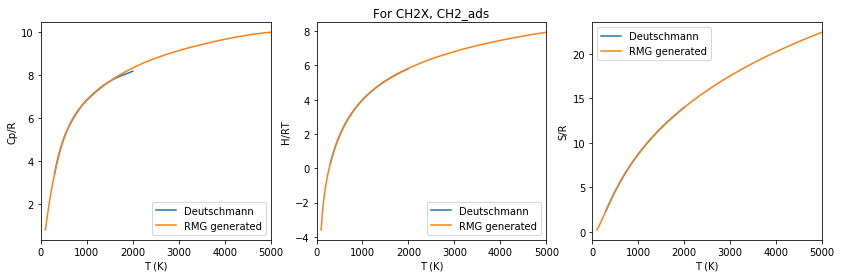

In [38]:
r1 = [100.00, 1199.84],[-1.02006572E+00,  2.03778530E-02, -2.17291021E-05,
                       1.15868493E-08, -2.38469826E-12, -3.52138311E+02,
                       2.99160375E+00]
r2 = [1199.84, 5000.00],[ 3.89285623E+00,  3.99892031E-03, -1.25227793E-06,
                       2.09081002E-10, -1.39642186E-14, -1.53105772E+03,
                      -2.16053785E+01]
d1 = [300.0, 1000.0], [-2.26602367E+00, 2.92517765E-02,
 		 -4.32728797E-05, 3.30655723E-08, -9.93242641E-12,
 		 -2.23619445E+02, 8.22751288E+00]
d2 = [1000.0, 2000.0], [6.82572636E+00, -5.17192506E-03,
 		 9.19551938E-06, -4.87101486E-09, 8.67713091E-13,
 		 -2.26886621E+03, -3.64410753E+01]
plot(r1,r2,d1,d2,'CH2X, CH2_ads')

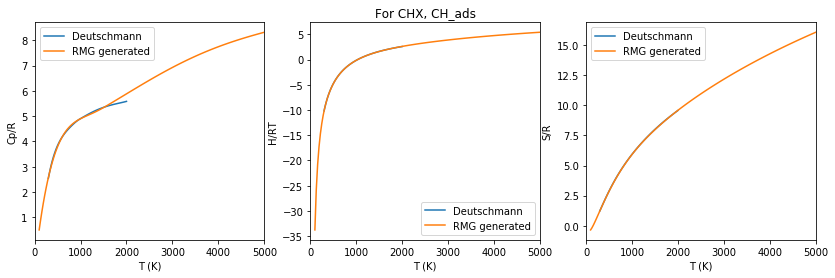

In [39]:
r1 = [100.00, 1596.82],[-9.66375286E-01,  1.63179008E-02, -1.75392291E-05,
                       8.64095972E-09, -1.55501482E-12, -3.35441189E+03,
                       2.54982388E+00]
r2 = [1596.82, 5000.00],[ 4.21481432E+00,  2.18380791E-04,  5.15663412E-07,
                      -1.20801040E-10,  8.35333025E-15, -4.61122814E+03,
                      -2.36254728E+01]
d1 = [300.0, 1000.0], [-3.00950779E+00, 3.02193341E-02,
 		 -4.99546294E-05, 3.99478464E-08, -1.23021593E-11,
 		 -3.13353859E+03, 1.12314464E+01]
d2 = [1000.0, 2000.0], [4.88482023E+00, -2.70846119E-03,
 		 4.84648118E-06, -2.58513645E-09, 4.63180319E-13,
 		 -4.75082800E+03, -2.67870735E+01]
plot(r1,r2,d1,d2,'CHX, CH_ads')

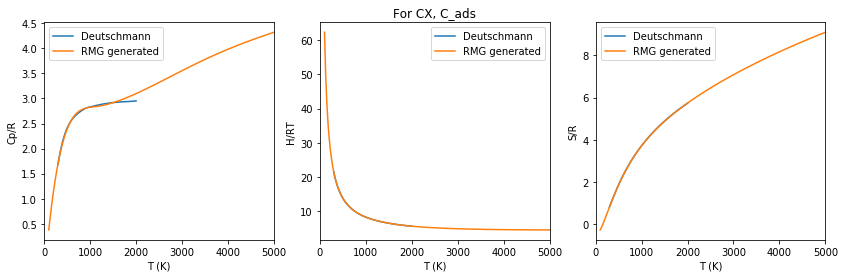

In [40]:
r1 = [100.00, 1401.12],[-6.04857256E-01,  1.10908355E-02, -1.34369676E-05,
                       7.18239043E-09, -1.40685313E-12,  6.24479347E+03,
                       1.48480345E+00]
r2 = [1401.12, 5000.00],[ 3.08076591E+00, -6.87473269E-04,  5.17593613E-07,
                      -9.73030868E-11,  6.24250814E-15,  5.33531584E+03,
                      -1.70991710E+01]
d1 = [300.0, 1000.0], [-1.73430697E+00, 1.89855471E-02,
 		 -3.23563661E-05, 2.59269890E-08, -7.99102104E-12,
 		 6.36385922E+03, 6.25445028E+00]
d2 = [1000.0, 2000.0], [2.82193241E+00, -6.61177416E-04,
 		 1.24180431E-06, -7.03993893E-10, 1.32276605E-13,
 		 5.46467816E+03, -1.55251271E+01]
plot(r1,r2,d1,d2,'CX, C_ads')

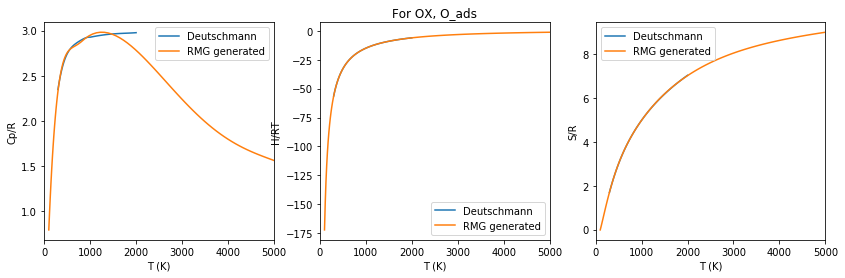

In [41]:
r1 = [100.00, 888.25],[-7.59018036E-01,  1.89869128E-02, -3.82476163E-05,
                       3.43561864E-08, -1.13976013E-11, -1.72389492E+04,
                       1.76019150E+00]
r2 = [888.25, 5000.00],[ 1.89894867E+00,  2.03293217E-03, -1.19975265E-06,
                       2.32677501E-10, -1.53505623E-14, -1.75145004E+04,
                      -9.64111055E+00]
d1 = [300.0, 1000.0], [1.79722382E-01, 1.25453156E-02,
 		 -2.29924588E-05, 1.94187177E-08, -6.22414099E-12,
 		 -1.73402246E+04, -2.22409728E+00]
d2 = [1000.0, 2000.0], [2.92050897E+00, -2.70455589E-04,
 		 5.15610634E-07, -2.93911213E-10, 5.54030466E-14,
 		 -1.78369003E+04, -1.50940536E+01]
plot(r1,r2,d1,d2,'OX, O_ads')

In [42]:
# not included in deutschmann
r1 = [100.00, 911.32],[-1.27860902E+00,  3.68015330E-02, -8.90316729E-05,
                       8.91160499E-08, -3.14524444E-11, -1.33397505E+03,
                       1.13162042E+01]
r2 = [911.32, 5000.00],[ 6.45748470E-01,  6.69543366E-03, -3.82678817E-06,
                       7.04696395E-10, -4.41000210E-14, -7.85303832E+02,
                       7.14568126E+00]
d1 = [300.0, 1000.0], [3.78935111E+00, 1.10148021E-03,
 		 -2.31320100E-06, 2.11937826E-09, -6.31350224E-13,
 		 -1.86700333E+03, -1.00616465E+01]
d2 = [1000.0, 2000.0], [4.06700165E+00, -5.01780079E-04,
 		 6.70738856E-07, -1.79170942E-10, 8.86886631E-15,
 		 -1.89107687E+03, -1.12621699E+01]
# plot(r1,r2,d1,d2,'H2X, H2_ads')

In [43]:
# not included in deutschmann
r1 = [100.00, 873.22],[-1.43679585E+00,  3.69243541E-02, -7.17904403E-05,
                       6.73532841E-08, -2.35178331E-11, -2.76851379E+04,
                       8.27561958E+00]
r2 = [873.22, 5000.00],[ 1.83280289E+00,  1.00778729E-02, -5.28533123E-06,
                       1.01351946E-09, -6.85183825E-14, -2.78036286E+04,
                      -4.46392663E+00]
d1 = [300.0, 1000.0], [8.63437744E-01, 2.14806054E-02,
 		 -3.00009525E-05, 2.11729011E-08, -5.90923491E-12,
 		 -3.09990999E+04, -5.10749731E+00]
d2 = [1000.0, 2000.0], [7.59479056E+00, -3.06847382E-03,
 		 5.43592647E-06, -2.86463560E-09, 5.09149225E-13,
 		 -3.25424988E+04, -3.83674793E+01]
# plot(r1,r2,d1,d2,'CHOX, COH_ads')

# Gas Species

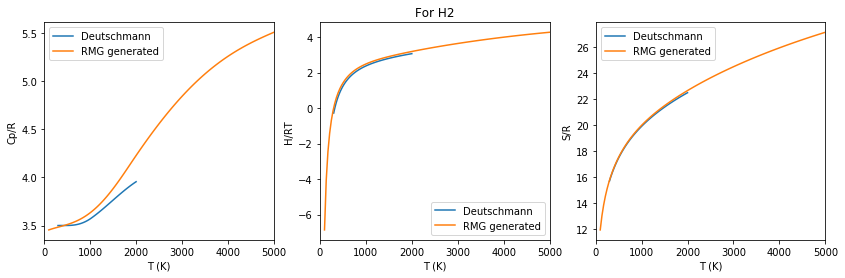

In [25]:
r1 = [100.00, 1959.08],[ 3.43536411E+00,  2.12710383E-04, -2.78625110E-07,
                       3.40267219E-10, -7.76032129E-14, -1.03135984E+03,
                      -3.90841731E+00]
r2 = [1959.08, 5000.00],[ 2.78816619E+00,  5.87640475E-04,  1.59010635E-07,
                      -5.52739465E-11,  4.34311304E-15, -5.96144481E+02,
                       1.12730527E-01]
d1 = [300.0, 1000.0], [3.46257353E+00, 2.90518829E-04,
 		 -7.73920615E-07, 7.85718742E-10, -1.96224926E-13,
 		 -1.13006370E+03, -4.12394568E+00]
d2 = [1000.0, 2000.0], [3.57047181E+00, -4.82858075E-04,
 		 6.34857803E-07, -1.58914955E-10, 5.10897208E-15,
 		 -1.12497470E+03, -4.53574851E+00]
plot(r1,r2,d1,d2,'H2')

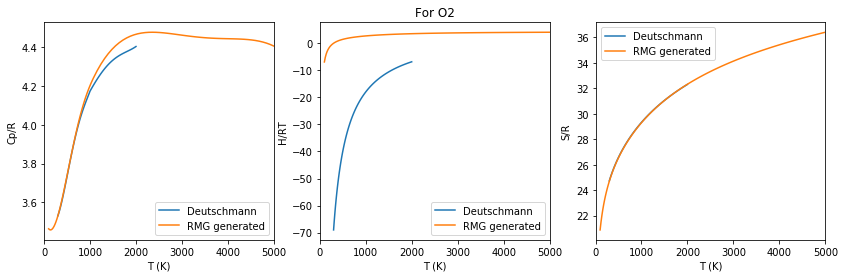

In [26]:
r1 = [100.00, 1074.56],[ 3.53732118E+00, -1.21570207E-03,  5.31615377E-06,
                      -4.89440387E-09,  1.45843816E-12, -1.03858843E+03,
                       4.68368631E+00]
r2 = [1074.56, 5000.00],[ 3.15382772E+00,  1.67803228E-03, -7.69967779E-07,
                       1.51273960E-10, -1.08781182E-14, -1.04082030E+03,
                       6.16751919E+00]
d1 = [300.0, 1000.0], [3.77364246E+00, -2.98737340E-03,
 		 9.93776248E-06, -9.93449363E-09, 3.38365880E-12,
 		 -2.17678543E+04, 3.73573477E+00]
d2 = [1000.0, 2000.0], [4.17061161E+00, -1.13959784E-03,
 		 2.08067401E-06, -1.15060194E-09, 2.12110882E-13,
 		 -2.20313451E+04, 9.39260796E-01]
plot(r1,r2,d1,d2,'O2')

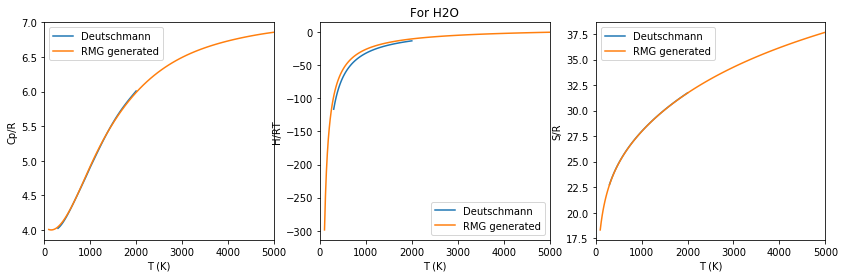

In [27]:
r1 = [100.00, 1130.25],[ 4.05763720E+00, -7.87951343E-04,  2.90882564E-06,
                      -1.47524910E-09,  2.12866372E-13, -3.02815867E+04,
                      -3.11369025E-01]
r2 = [1130.25, 5000.00],[ 2.84324104E+00,  2.75110073E-03, -7.81040007E-07,
                       1.07245603E-10, -5.79408217E-15, -2.99586086E+04,
                       5.91047337E+00]
d1 = [300.0, 1000.0], [4.19741891E+00, -2.12047374E-03,
 		 6.67208194E-06, -5.68145594E-09, 1.83632189E-12,
 		 -3.61454792E+04, -8.17615498E-01]
d2 = [1000.0, 2000.0], [4.90234443E+00, -2.97941742E-03,
 		 4.97806896E-06, -2.38820786E-09, 3.91104950E-13,
 		 -3.63905305E+04, -4.71756345E+00]
plot(r1,r2,d1,d2,'H2O')

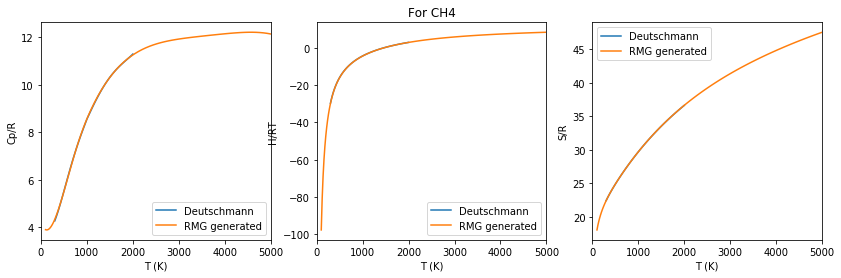

In [28]:
r1 = [100.00, 1084.15],[ 4.20540072E+00, -5.35540640E-03,  2.51117636E-05,
                      -2.13755910E-08,  5.97496145E-12, -1.01619427E+04,
                      -9.21226951E-01]
r2 = [1084.15, 5000.00],[ 9.08349401E-01,  1.14539479E-02, -4.57166053E-06,
                       8.29173612E-10, -5.66300105E-14, -9.72001110E+03,
                       1.39926204E+01]
d1 = [300.0, 1000.0], [4.34529103E+00, -7.86312881E-03,
 		 3.43928711E-05, -3.35263832E-08, 1.12037758E-11,
 		 -1.01104300E+04, -1.28140275E+00]
d2 = [1000.0, 2000.0], [8.53393015E+00, -1.03779604E-02,
 		 1.83235982E-05, -9.63187224E-09, 1.70473021E-12,
 		 -1.17590477E+04, -2.52561043E+01]
plot(r1,r2,d1,d2,'CH4')

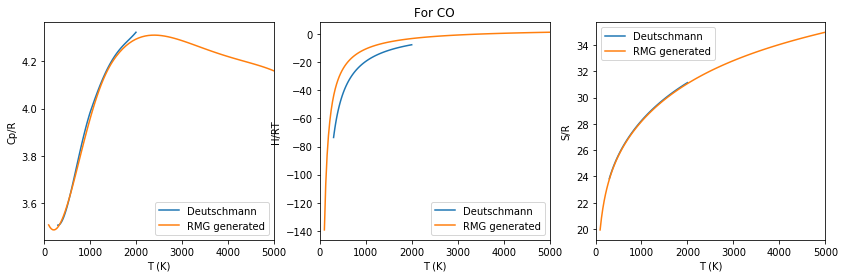

In [29]:
r1 = [100.00, 1571.64],[ 3.56837982E+00, -8.52124063E-04,  2.48917390E-06,
                      -1.56330672E-09,  3.13594213E-13, -1.42842549E+04,
                       3.57912239E+00]
r2 = [1571.64, 5000.00],[ 2.91306987E+00,  1.64657389E-03, -6.88612820E-07,
                       1.21036930E-10, -7.84014743E-15, -1.41808862E+04,
                       6.71043900E+00]
d1 = [300.0, 1000.0], [3.82554092E+00, -2.44305678E-03,
 		 5.74397160E-06, -4.15861029E-09, 1.01475946E-12,
 		 -2.31566234E+04, 2.52026189E+00]
d2 = [1000.0, 2000.0], [3.97703009E+00, -1.46328395E-03,
 		 2.63155983E-06, -1.41878725E-09, 2.56086184E-13,
 		 -2.32937496E+04, 1.32663879E+00]
plot(r1,r2,d1,d2,'CO')

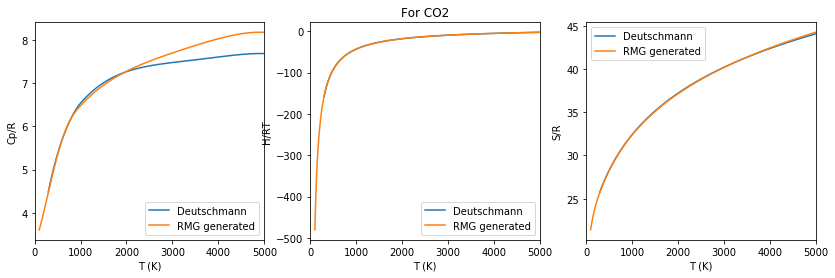

In [30]:
r1 = [100.00, 978.22],[ 3.28083821E+00,  2.50193291E-03,  8.08164577E-06,
                      -1.20506695E-08,  4.66526645E-12, -4.84008301E+04,
                       6.00083693E+00]
r2 = [978.22, 5000.00],[ 4.67429780E+00,  2.60958835E-03, -9.85659769E-07,
                       1.95706729E-10, -1.49830320E-14, -4.89512267E+04,
                      -2.11090702E+00]
d1 = [  300.00,  1000.00], [  2.275724650E+00,   9.922072290E-03,
               -1.040911320E-05,   6.866686780E-09,  -2.117280090E-12,
               -4.837314060E+04,   1.018848800E+01]
d2 = [ 1000.00,  5000.00], [  4.453622820E+00,   3.140168730E-03,
               -1.278410540E-06,   2.393996670E-10,  -1.669033190E-14,
               -4.896696090E+04,  -9.553958770E-01]
plot(r1,r2,d1,d2,'CO2')

In [ ]:
r1 = 
r2 = 
d1 = 
d2 = 
plot(r1,r2,d1,d2,)